# CIFAR10 딥러닝 모델
CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있다.  
데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있다.

## 데이터 로드 및 전처리
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
    - 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋 활용
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수 활용
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력





In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

### 데이터셋 로드

In [3]:
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 데이터셋 크기 확인
print(len(x_train_full))
print(len(y_train_full))

170508288/170498071 [==============================] - 3s 0us/step
50000
50000


### 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, 
                                                  test_size=0.2, 
                                                  random_state=42)

# 데이터셋 정보 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


### class_name 변수
cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담는다.

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

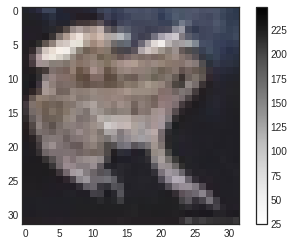

In [6]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [7]:
# 훈련, 검증, 테스트 데이터의 형태(shape) 출력
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


### 데이터의 형태 변형
모델이 잘 학습할 수 있게끔 해주기 위함이다.

In [9]:
# 훈련, 검증, 테스트 데이터셋의 형태(shape) 변형
x_train = x_train.reshape(x_train.shape[0], 3072)
x_val = x_val.reshape(x_val.shape[0], 3072)
x_test = x_test.reshape(x_test.shape[0], 3072)

# 새로운 형태의 데이터셋 크기를 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [10]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [34]:
from tensorflow.keras.utils import to_categorical

# 원-핫 인코딩으로 레이블 변환
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# 변환된 레이블 형태 확인
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## 모델 구성 및 컴파일

### 모델 구성

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(10, activation='softmax')
])

### 모델 컴파일

In [55]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 모델 요약 출력

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

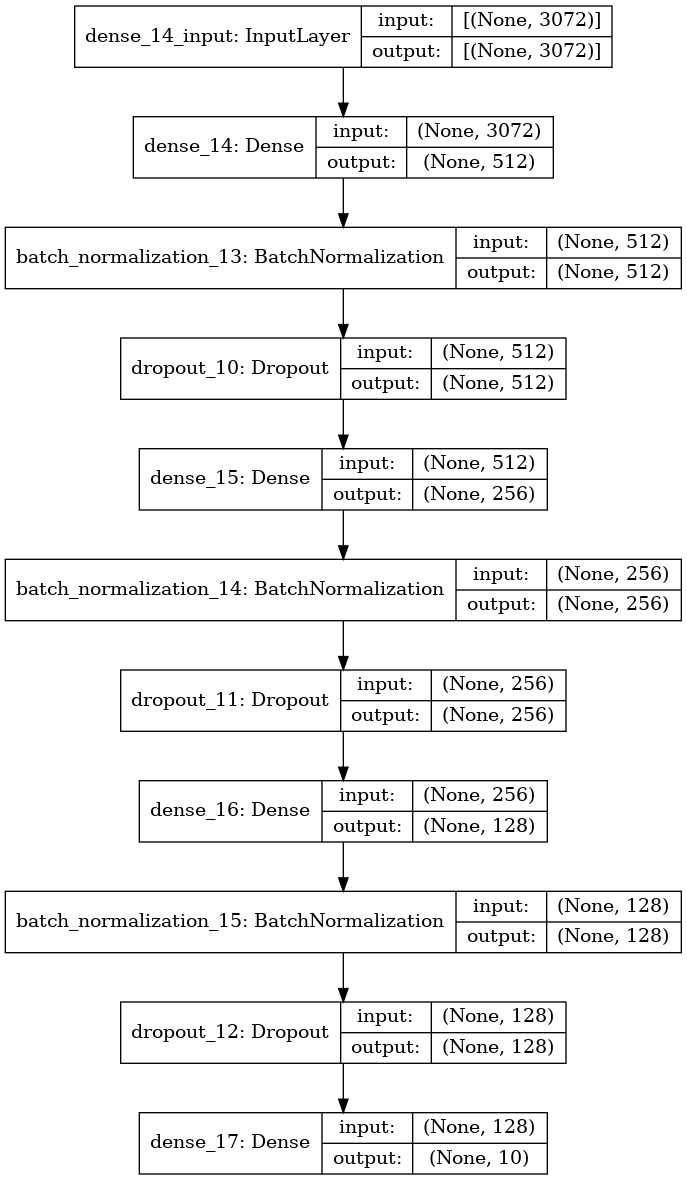

In [57]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

## 모델 학습
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행

### ModelCheckpoint

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백 설정
checkpoint_path = "~aiffel/aiffel/deep_learning_project/best_model.h5"  # 최적 모델 저장 경로
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                                   save_best_only=True, 
                                   monitor='val_loss', 
                                   mode='min', 
                                   verbose=1)

### EarlyStopping

In [59]:
# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10, 
                               restore_best_weights=True, 
                               verbose=1)

### 모델 학습

In [60]:
history = model.fit(x_train, y_train,
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(x_val, y_val),
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
625/625 [==============================] - 4s 5ms/step - loss: 1.9212 - accuracy: 0.3260 - val_loss: 2.0117 - val_accuracy: 0.2877

Epoch 00001: val_loss improved from inf to 2.01170, saving model to ~aiffel/aiffel/deep_learning_project/best_model.h5
Epoch 2/100
625/625 [==============================] - 3s 4ms/step - loss: 1.6884 - accuracy: 0.3966 - val_loss: 1.7125 - val_accuracy: 0.3883

Epoch 00002: val_loss improved from 2.01170 to 1.71250, saving model to ~aiffel/aiffel/deep_learning_project/best_model.h5
Epoch 3/100
625/625 [==============================] - 3s 4ms/step - loss: 1.6082 - accuracy: 0.4262 - val_loss: 1.8254 - val_accuracy: 0.3450

Epoch 00003: val_loss did not improve from 1.71250
Epoch 4/100
625/625 [==============================] - 3s 4ms/step - loss: 1.5887 - accuracy: 0.4324 - val_loss: 1.5867 - val_accuracy: 0.4339

Epoch 00004: val_loss improved from 1.71250 to 1.58668, saving model to ~aiffel/aiffel/deep_learning_project/best_model.h5
Epoch 5/

### 시각화 

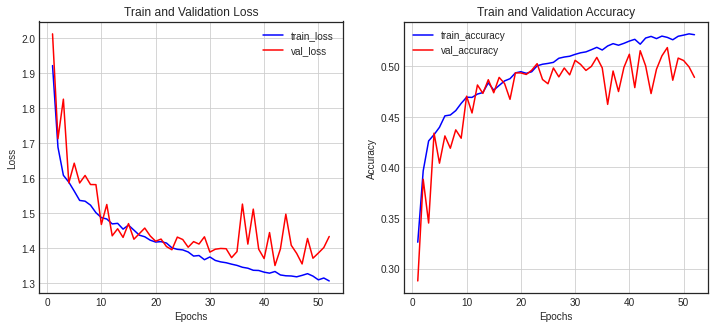

In [61]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

### 모델 평가

In [62]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 - 1s - loss: 1.3455 - accuracy: 0.5177
Test Loss: 1.3455350399017334
Test Accuracy: 0.5177000164985657


### 모델 예측

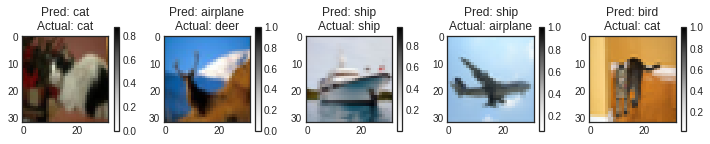

In [63]:
# 5개의 랜덤 인덱스 선택
random_indices = np.random.randint(0, len(x_test), 5)

# 시각화
plt.figure(figsize=(10, 2))
for i, index in enumerate(random_indices):
    # 랜덤한 테스트 이미지에 대한 예측 수행
    prediction = model.predict(x_test[index:index+1])
    predicted_label = class_names[prediction.argmax()]
    actual_label = class_names[y_test[index].argmax()]
    
    # 이미지 시각화
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[index].reshape(32, 32, 3), interpolation='nearest')
    plt.colorbar()
    plt.grid(False)
    plt.title(f"Pred: {predicted_label}\nActual: {actual_label}")

plt.tight_layout()
plt.show()

## 결과 
1. 초기 모델 드랍아웃 0.5  
테스트 데이터셋에 대한 손실 값(Loss)은 1.5041이고, 정확도(Accuracy)는 약 46.67%이다.   
이 결과는 모델이 테스트 데이터셋에 대해 약 절반 가까이의 정확도로 예측을 수행했음을 나타낸다.  
모델의 정확도가 50%에 못 미치는 것은 여러 가지 요인에 의해 발생할 수 있다.   
이는 모델이 데이터의 특징을 충분히 학습하지 못했거나, 모델 구조가 데이터셋의 복잡성을 적절히 반영하지 못했을 가능성을 시사한다.

2. 드랍아웃 0.2  
Test Loss: 1.3455350399017334  
Test Accuracy: 0.5177000164985657

사실 지금까지 배운 Dense Layer만 활용해서는 이번 프로젝트에서 높은 accuracy를 얻기는 힘들다. 
이미지 데이터를 다루기 위해서는 이미지에 적합한 CNN(Convolution Neural Network) 계열의 모델을 사용해야 한다.   
CNN에 대한 내용은 Computer Vision 과정을 통해 더 배울 수 있다.